# Approximation of energy interval with Numpy

In this code, we demonstrate how to find the energy interval with Numpy. The running time sufficiently lower than Sympy. However, the accuracy is bad and might be overflow when large size of matrices.

In [1]:
import os, time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Recursion relation (for more details, please see the corresponding sympy version)

---

For Harmonic : $\langle X^{s}\rangle \ =\  \frac{(s-1)E}{ks}\langle X^{s-2}\rangle + \frac{(s-1)(s-2)(s-3)}{8ks}\langle X^{s-4}\rangle$

With $\langle X^0\rangle=1$ by normalization, and $\langle X^1\rangle=0$ by symmetry. Also, take $s=2$ we get $\langle X^2\rangle=\frac{E}{2k}$

---

For Hydrogen : $-E\langle r^s\rangle = \frac{k(2s+1)}{2(s+1)}\langle r^{s-1}\rangle + [\frac{s(s-1)}{8} - \frac{sl(l+1)}{2(s+1)}]\langle r^{s-2}\rangle$

$\langle r^0\rangle=1$ by normalization. Take $s=1$, we get $\langle r^1\rangle=-\frac{3k}{4E}-\frac{l(l+1)}{2k}$

In [68]:
def hp_matrix(E, L, k=0.5):
    Xs = []
    for s in range(2*(L-1)+1):
        if s == 0: Xs.append(1)
        elif s == 2: Xs.append(E/(2*k))
        elif s%2 == 1: Xs.append(0)
        else: Xs.append((s-1)*E*Xs[-2]/(k*s) + (s-1)*(s-2)*(s-3)*Xs[-4]/(8*k*s))
    matrix = np.array([[Xs[i+j] for i in range(L)] for j in range(L)], dtype=np.float64)
    return matrix

def cp_matrix(E, L, k=1, l=1):
    # To avoid overflow and unable to computing, change -1/E -> E
    rs = []
    for s in range(2*(L-1)+1):
        if s == 0: rs.append(1)
        elif s == 1: rs.append(E*3*k/4 - l*(l+1)/2/k)
        else: rs.append(E*k*(2*s+1)/(2*s+2)*rs[-1] + E*(s*(s-1)/8-s*l*(l+1)/(2*s+2))*rs[-2])
    matrix = np.array([[rs[i+j] for i in range(L)] for j in range(L)], dtype=np.float64)
    return matrix

### Harmonic

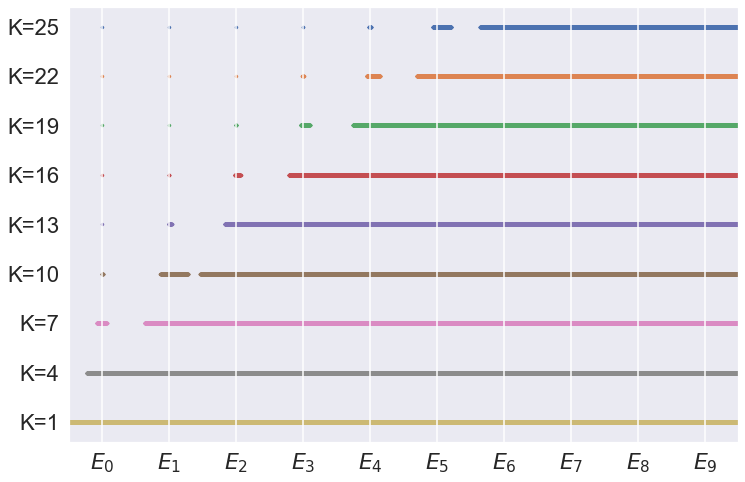

In [75]:
a, b = 0, 10 # solving interval [a,b]
eps = 1e-3 # step size
L = 25 # size of matrix
k = 0.5 # potential constant
plot_step = 3

positive_interval = [[] for _ in range(L//plot_step+1)]
for E in np.arange(a, b, eps):
    matrix = hp_matrix(E, L, k)
    for K in range(L):
        submatrix = matrix[:K+1, :K+1]
        if np.linalg.det(submatrix) <= 0:
            break
        if K%plot_step == 0:
            positive_interval[K//plot_step].append(E)

energy_eigenvalues = [(2*k)**0.5 * (n+0.5) for n in range(L)]
x_ticks = [r"$E_{{{}}}$".format(i) for i in range(len(energy_eigenvalues))]

fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(energy_eigenvalues, x_ticks)
for En in energy_eigenvalues:
    plt.axvline(x=En, color='white')
ax.set_xlim(a, b)

sns.set(font_scale=2)
sns.set_style('dark')
for i in range(len(positive_interval)-1, -1, -1):
    x = positive_interval[i]
    y = [f"K={1+i*plot_step}"] * len(x)
    sns.scatterplot(x=x, y=y, s=10, edgecolor=None)

### Hydrogen

/Users/yianchen/.pyenv/versions/3.8.9/lib/python3.8/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


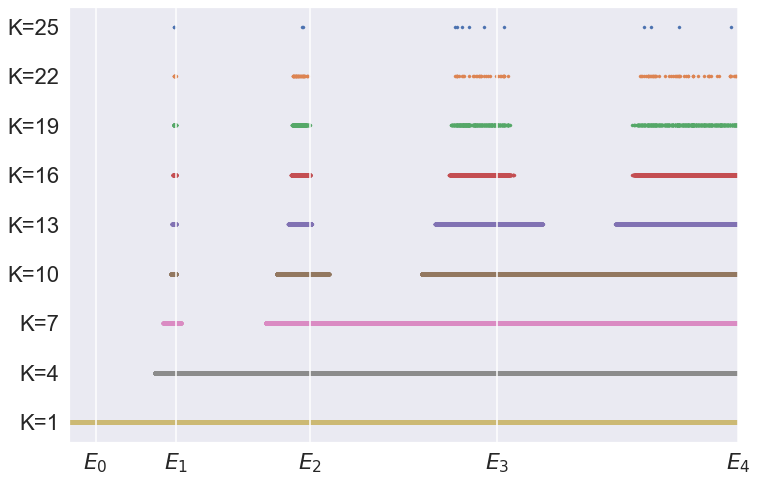

In [78]:
a, b = 0, 50 # solving interval [a,b]
eps = 1e-3 # step size
L = 25 # size of matrix
k = 1 # potential constant
l = 1 # angular quantum number
plot_step = 3

positive_interval = [[] for _ in range(L//plot_step+1)]
for E in np.arange(a, b, eps):
    matrix = cp_matrix(E, L, k, l=1)
    for K in range(L):
        submatrix = matrix[:K+1, :K+1]
        if np.linalg.det(submatrix) <= 0:
            break
        if K%plot_step == 0:
            positive_interval[K//plot_step].append(E)

energy_eigenvalues = [2*(n**2)/k**2 for n in range(1, L+1)]
x_ticks = [r"$E_{{{}}}$".format(i) for i in range(len(energy_eigenvalues))]

fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(energy_eigenvalues, x_ticks)
for En in energy_eigenvalues:
    plt.axvline(x=En, color='white')
ax.set_xlim(a, b)

sns.set(font_scale=2)
sns.set_style('dark')
for i in range(len(positive_interval)-1, -1, -1):
    x = positive_interval[i]
    y = [f"K={1+i*plot_step}"] * len(x)
    sns.scatterplot(x=x, y=y, s=10, edgecolor=None)